In [675]:
from tqdm import tqdm
import numpy as np
from requests import get
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Dict
from pprint import pprint as pp
import datetime
import pickle

In [26]:
file = open("all_buoys.pickle",'rb')
master_dict = pickle.load(file)
file = open("buoy_metadata.pickle",'rb')
meta_dict = pickle.load(file)

In [676]:
c = []
for i in meta_dict:
    for j in meta_dict[i]:
        if 'chlorophyll' in meta_dict[i][j]:
            c.append(j)
dfs = {k:[] for k in c}
for k in c:
    try:
        dfs[k] = pd.read_csv(data_url(k,'csv'))[['time','chlorophyll']]
    except Exception:
        dfs[k] = pd.read_json(data_url(k,'json'))[['time','chlorophyll']]
for i in ['ACFFA_CSV_all','UNH_CML','M01_optics_hist',
 'E05_optics_all',
 'URI_168-MV_BottomSonde',
 'URI_168-MV_SurfaceSonde',
 'URI_169-QP_BottomSonde',
 'URI_GSOPier_ExoTop',
 'E01_optics_hist',
 'B01_optics_hist']:
    dfs.pop(i)
for k,df in dfs.items():
    try:
        df['time'] = pd.to_datetime(df['time'])
    except Exception:
        new_df = df.drop(0)
        new_df['time'] = pd.to_datetime(new_df['time'])
        df = new_df
    df = df.drop(df[df['chlorophyll'].isna()].index)
    df['chlorophyll'] = df['chlorophyll'].astype(float)
    dfs[k] = df

/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_78172/183827859.py:9: DtypeWarning: Columns (3,4,5,6,12,18,24,30,34,50,56,62,68,74,78,84) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[k] = pd.read_csv(data_url(k,'csv'))[['time','chlorophyll']]
/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_78172/183827859.py:9: DtypeWarning: Columns (2,3,4,5,11,17,23,29,33,39,45,51,57,61,67,73) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[k] = pd.read_csv(data_url(k,'csv'))[['time','chlorophyll']]
/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_78172/183827859.py:9: DtypeWarning: Columns (6,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[k] = pd.read_csv(data_url(k,'csv'))[['time','chlorophyll']]
/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_78172/183827859.py:9: DtypeWarning: Columns (6,8,10,11,12) have mixed types. Specify dtype option on impo

In [710]:
dfs.keys()

dict_keys(['J04_optics_all', 'UNH_CML_realtime', 'UNH_CO2_realtime', 'UNH_GBB', 'LOBO_CSV_66', 'LOBO_CSV_65', 'LOBO_CSV_64', 'LOBO_CSV_67', 'LOBO_CSV_70', 'LOBO_CSV_72', 'D03_optics_all', 'I01_optics_hist', 'C05_optics_all', 'A01_optics_s_all', 'URI_169-QP_SurfaceSonde', 'URI_CPoint_BottomSonde', 'URI_CPoint_SurfaceSonde', 'URI_GBay_BottomSonde', 'URI_GBay_SurfaceSonde', 'URI_NP_BottomSonde', 'URI_NP_SurfaceSonde', 'URI_PP_BottomSonde', 'URI_PP_SurfaceSonde'])

/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_78172/2532989656.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = x.groupby(x['time'].dt.date).median()
/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_78172/2532989656.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = x.groupby(x['time'].dt.date).median()
/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_78172/2532989656.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select 

AttributeError: 'Figure' object has no attribute 'save_fig'

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

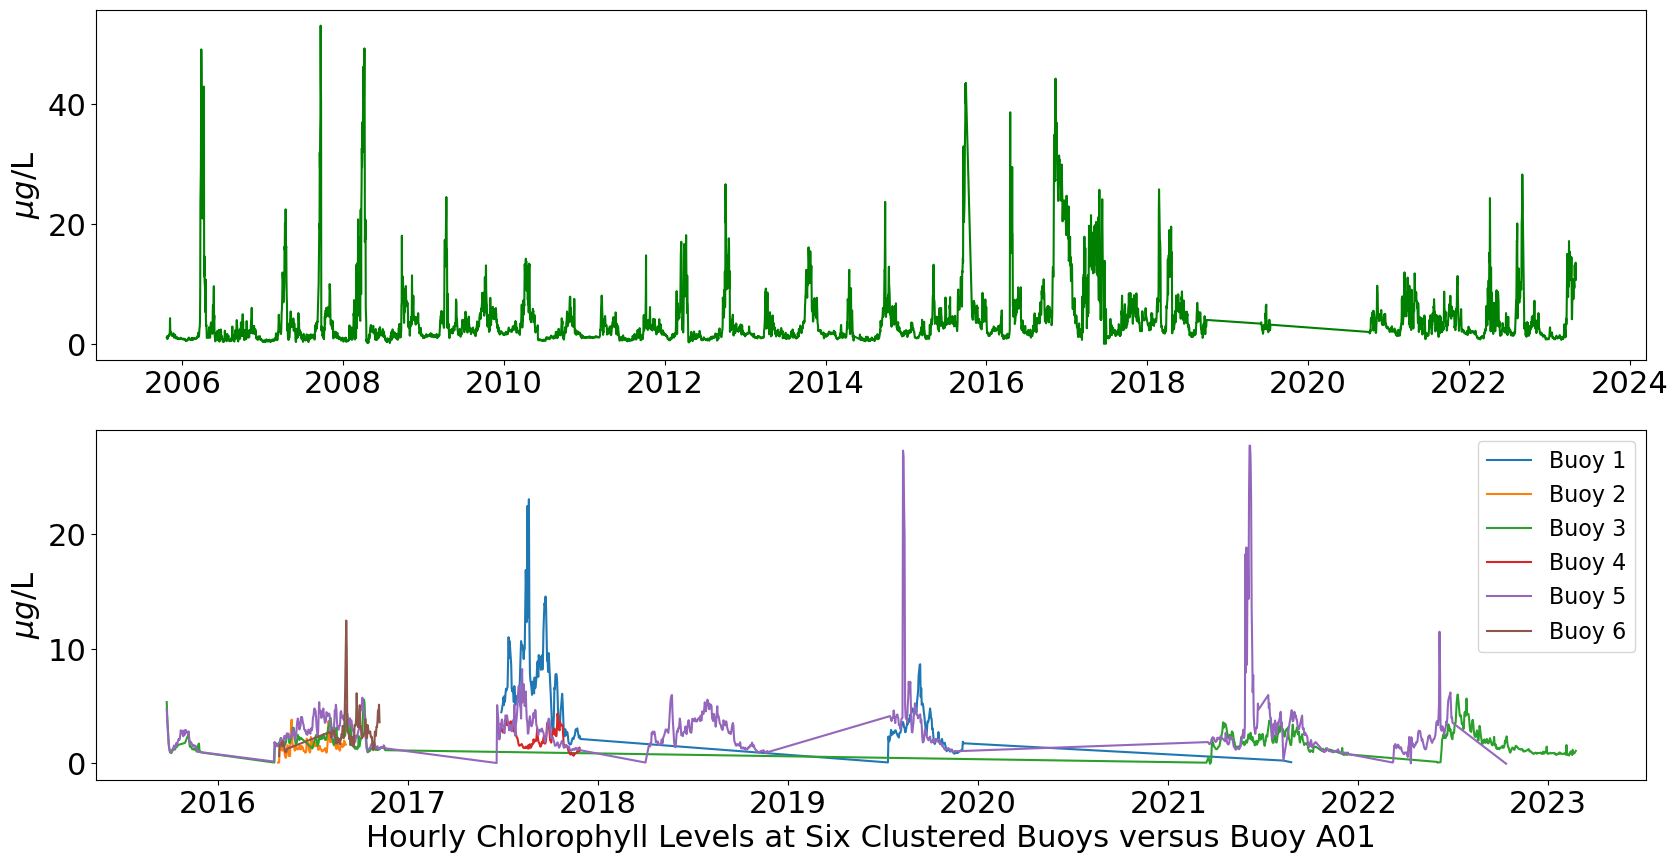

In [741]:
font = {'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
fig, ax= plt.subplots(2,1, figsize = (20,10))
x = dfs['A01_optics_s_all']
y = x.groupby(x['time'].dt.date).median()
ax[0].plot(y, '-',c='g', label='A01')
x = dfs['LOBO_CSV_70']
y = x.groupby(x['time'].dt.date).median()
ax[1].plot(y, '-',label='Buoy 1')
x = dfs['LOBO_CSV_67']
y = x.groupby(x['time'].dt.date).median()
ax[1].plot(y, '-',label='Buoy 2')
x = dfs['LOBO_CSV_65']
y = x.groupby(x['time'].dt.date).median()
ax[1].plot(y, '-',label='Buoy 3')
x = dfs['LOBO_CSV_72']
y = x.groupby(x['time'].dt.date).median()
ax[1].plot(y, '-',label='Buoy 4')
x = dfs['LOBO_CSV_66']
y = x.groupby(x['time'].dt.date).median()
ax[1].plot(y, '-',label='Buoy 5')
x = dfs['LOBO_CSV_64']
y = x.groupby(x['time'].dt.date).medi an()
ax[1].plot(y, '-',label='Buoy 6')
ax[1].set_xlabel("Hourly Chlorophyll Levels at Six Clustered Buoys versus Buoy A01")
ax[1].set_ylabel("$\mu g$/L")
ax[0].set_ylabel("$\mu g$/L")
ax[1].legend(fontsize=16)
fig.save_fig('buoys.png')

In [491]:
[list(dfs.keys())[i] for i in np.where(bools[:,4900:].sum(1)==0)[0]]

['M01_optics_hist', 'I01_optics_hist', 'E01_optics_hist', 'B01_optics_hist']

In [493]:
for i in [list(dfs.keys())[i] for i in np.where(bools[:,4900:].sum(1)==0)[0]]:
    del dfs[i]

In [506]:
df['chlorophyll'].astype(float)

1       10.5
2       10.5
3       10.6
4       11.1
5       10.5
        ... 
8457     5.3
8458     5.6
8459     5.7
8460     5.8
8461     5.4
Name: chlorophyll, Length: 8461, dtype: float64

In [565]:
bad = [10,13,18,19,20,26,15,17]
[list(dfs.keys())[i] for i in bad]

['M01_optics_hist',
 'E05_optics_all',
 'URI_168-MV_BottomSonde',
 'URI_168-MV_SurfaceSonde',
 'URI_169-QP_BottomSonde',
 'URI_GSOPier_ExoTop',
 'E01_optics_hist',
 'B01_optics_hist']

In [642]:
dates[-1000]

datetime.date(2020, 8, 5)

In [620]:
str(datetime.date(2016, 8, 21))

'2016-08-21'

In [562]:
list(dfs.keys())[16] 

'A01_optics_s_all'

In [615]:
df['time'].dt.date.values

array([datetime.date(2018, 7, 20), datetime.date(2018, 7, 20),
       datetime.date(2018, 7, 20), ..., datetime.date(2019, 4, 5),
       datetime.date(2019, 4, 5), datetime.date(2019, 4, 5)], dtype=object)

In [637]:
drange = list(pd.date_range('2001-01-01','2023-5-1'))
day2int = {str(i.date()):d for d,i in enumerate(drange)}
int2day = {d:str(i) for i,d in day2int.items()}



In [644]:
vals = pd.DataFrame(columns = list(dfs.keys()),index =[day2int[str(i.date())] for i in pd.date_range('2015-7-17','2022-12-29')])

In [645]:
vals

,J04_optics_all,UNH_CML_realtime,UNH_CO2_realtime,UNH_GBB,LOBO_CSV_66,LOBO_CSV_65,LOBO_CSV_64,LOBO_CSV_67,LOBO_CSV_70,LOBO_CSV_72,...,A01_optics_s_all,URI_169-QP_SurfaceSonde,URI_CPoint_BottomSonde,URI_CPoint_SurfaceSonde,URI_GBay_BottomSonde,URI_GBay_SurfaceSonde,URI_NP_BottomSonde,URI_NP_SurfaceSonde,URI_PP_BottomSonde,URI_PP_SurfaceSonde
5310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [661]:
vals[k].loc[[i for i in s.index if i in vals.index]]

6770    NaN
6771    NaN
6772    NaN
6773    NaN
6774    NaN
       ... 
7216    NaN
7217    NaN
7218    NaN
7219    NaN
7220    NaN
Name: URI_PP_SurfaceSonde, Length: 132, dtype: object

In [667]:
for k,df in dfs.items():
    s= pd.DataFrame(df.loc[abs(df['chlorophyll'])<60].loc[df['chlorophyll']>0].groupby(df['time'].dt.date)['chlorophyll'].median())
    print(str(s.index))
    s['index'] = [day2int[str(i)] for i in s.index]
    s = s.set_index('index')
    cup = [i for i in s.index if i in vals.index]
    vals[k].loc[cup] = s['chlorophyll'].loc[cup]
vals = vals.drop('I01_optics_hist', axis = 1)

Index([2018-07-20, 2018-07-21, 2018-07-22, 2018-07-23, 2018-07-24, 2018-07-25,
       2018-07-26, 2018-07-27, 2018-07-28, 2018-07-29,
       ...
       2019-03-27, 2019-03-28, 2019-03-29, 2019-03-30, 2019-03-31, 2019-04-01,
       2019-04-02, 2019-04-03, 2019-04-04, 2019-04-05],
      dtype='object', name='time', length=259)
Index([2021-08-24, 2021-08-25, 2021-08-26, 2021-08-27, 2021-08-28, 2021-08-29,
       2021-08-30, 2021-08-31, 2021-09-01, 2021-09-02,
       ...
       2022-09-12, 2022-09-13, 2022-09-14, 2022-09-15, 2022-09-16, 2022-09-17,
       2022-09-18, 2022-09-19, 2022-09-20, 2022-09-21],
      dtype='object', name='time', length=308)
Index([2021-08-10, 2021-08-11, 2021-08-12, 2021-08-13, 2021-08-14, 2021-08-19,
       2021-08-20, 2021-08-21, 2021-08-22, 2021-08-23,
       ...
       2022-05-16, 2022-05-17, 2022-05-18, 2022-05-19, 2022-05-20, 2022-05-21,
       2022-05-22, 2022-05-23, 2022-05-24, 2023-02-22],
      dtype='object', name='time', length=279)
Index([2022-05-17, 

In [674]:
file = open('final_X.pkl', 'wb')
pickle.dump(vals,file)

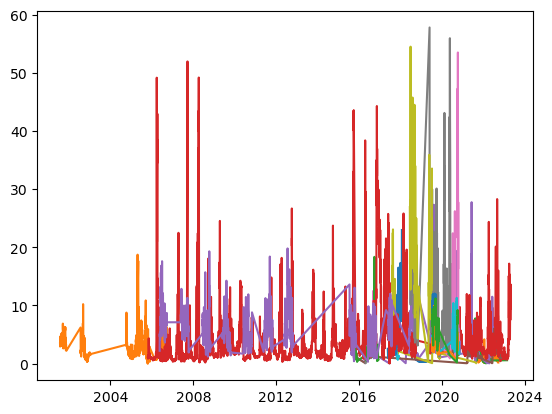

In [572]:

for df in dfs.values():
    plt.plot(df.loc[abs(df['chlorophyll'])<60].loc[df['chlorophyll']>0].groupby(df['time'].dt.date)['chlorophyll'].median())

In [34]:
def data_url(datasetID: str, flavor: str = 'json') -> Dict:
    data_url: str = f"http://www.neracoos.org/erddap/tabledap/{datasetID}.{flavor}"
    return data_url

TypeError: string indices must be integers

In [563]:
dates[4940]

datetime.date(2015, 7, 17)

In [265]:
dates = set()
for df in dfs.values():
    dates = dates.union(df['time'].dt.date.values)
dates = np.sort(np.array(list(dates)))

In [266]:
len(dates)

7754

In [227]:
m = []
for df in dfs.values():
    m.append(len(set(df['time'].dt.date.values))/len(dates))

In [397]:
from tqdm import tqdm
bools = []
for df in tqdm(dfs.values()):
    bools.append(np.isin(dates,df['time'].dt.date.values))
bools = np.array(bools)

100%|███████████████████████████████████████████| 31/31 [00:49<00:00,  1.60s/it]


In [478]:
len(bools.sum(0)[4940:])

2814

In [468]:
bools.sum(0)[4940:].mean() 

3.901208244491827

In [487]:
np.where(bools[:,4900:].sum(1)==0)[0]

array([10, 12, 15, 17])

In [488]:
[list(dfs.keys())[i] for i in np.where(bools[:,4900:].sum(1)==0)[0]]

['M01_optics_hist', 'I01_optics_hist', 'E01_optics_hist', 'B01_optics_hist']

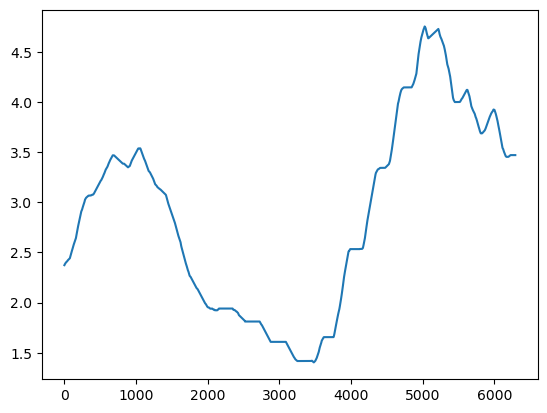

In [444]:
plt.plot([bools.sum(0)[x:x+1460].mean() for x in range(0,len(dates)-1460)])

In [394]:
x = range(4000,5000)
np.median(bools.sum(0)[x]/len(x))

0.001

In [312]:
y = dates
start = range(len(y)-1460)
ranges = [(a, 1460+a) for a in start]

In [358]:
import itertools
combos = list(itertools.combinations(range(31), 5))

In [339]:
np.array([[1,1,1],[2,2,2],[3,3,3]])[1]

array([2, 2, 2])

In [341]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [359]:
for i in combos:
    print(i)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [384]:
from timeit import timeit

In [382]:
time.start()
time.stop()

NameError: name 'time' is not defined

In [387]:
%%timeit
b = bools.astype(int)
o = np.zeros(len(list(combos)))
for i,combo in enumerate(combos):
    o[i] = bools[combo,:].prod(0).sum()

6.53 s ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [241]:
df['time'].dt.date.values.shape

(8461,)

In [244]:
dates = np.array(list(dates))
np.isin(dates,df['time'].dt.date.values)

TypeError: iteration over a 0-d array

In [49]:
df['chlorophyll']

0        micrograms/liter
1                    5.37
2                    5.41
3                    5.35
4                    4.75
               ...       
16594                 NaN
16595                 NaN
16596                 NaN
16597                 NaN
16598                 NaN
Name: chlorophyll, Length: 16599, dtype: object

In [11]:
def load_pickle(pickle_file):
    try:
        with open(pickle_file, 'rb') as f:
            pickle_data = pickle.load(f)
    except UnicodeDecodeError as e:
        with open(pickle_file, 'rb') as f:
            pickle_data = pickle.load(f, encoding='latin1')
    except Exception as e:
        print('Unable to load data ', pickle_file, ':', e)
        raise
    return pickle_data


adj_mx = load_pickle("adj_mx.pkl copy")

In [26]:
import networkx as nx
adj_mx = np.array(adj_mx)
G = nx.Graph(adj_mx[2])

In [29]:
nx.degree(G)

DegreeView({0: 20, 1: 17, 2: 16, 3: 19, 4: 22, 5: 19, 6: 14, 7: 21, 8: 9, 9: 12, 10: 12, 11: 17, 12: 23, 13: 20, 14: 13, 15: 19, 16: 27, 17: 19, 18: 7, 19: 19, 20: 19, 21: 7, 22: 18, 23: 7, 24: 19, 25: 10, 26: 2, 27: 20, 28: 19, 29: 9, 30: 14, 31: 8, 32: 19, 33: 20, 34: 10, 35: 10, 36: 11, 37: 17, 38: 18, 39: 17, 40: 18, 41: 16, 42: 19, 43: 18, 44: 10, 45: 10, 46: 6, 47: 12, 48: 17, 49: 13, 50: 8, 51: 5, 52: 9, 53: 17, 54: 17, 55: 18, 56: 9, 57: 16, 58: 17, 59: 9, 60: 14, 61: 8, 62: 12, 63: 14, 64: 12, 65: 8, 66: 5, 67: 14, 68: 19, 69: 14, 70: 14, 71: 19, 72: 20, 73: 13, 74: 16, 75: 12, 76: 14, 77: 19, 78: 15, 79: 18, 80: 22, 81: 18, 82: 20, 83: 9, 84: 16, 85: 20, 86: 10, 87: 13, 88: 17, 89: 13, 90: 6, 91: 19, 92: 11, 93: 18, 94: 18, 95: 16, 96: 19, 97: 20, 98: 17, 99: 6, 100: 11, 101: 17, 102: 20, 103: 18, 104: 11, 105: 13, 106: 11, 107: 13, 108: 17, 109: 14, 110: 16, 111: 18, 112: 6, 113: 17, 114: 17, 115: 13, 116: 11, 117: 18, 118: 15, 119: 19, 120: 7, 121: 6, 122: 13, 123: 15, 124:

In [4]:
UoM = list(filter(lambda x: len(x.split("0")[0]) == 1, list(meta_dict.keys())))
buoy_cols = {}
buoy_times = {}
buoy_constants = {key:[] for key in UoM}
for buoy in UoM:
    unique_cols = set()
    unique_times = set()
    for i in  meta_dict[buoy]:
        df = master_dict[i]
        non_const= df.nunique()>2
        const = non_const[[not i for i in non_const]].index
        for c in const:
            tup = (c, df[c].values[0])
            print(tup)
            buoy_constants[buoy].append(tup)
        df = df[non_const[non_const].index]
        unique_cols= unique_cols.union(set(df.columns))
        unique_times= unique_times.union(set(df.index))
    buoy_cols[buoy]=list(unique_cols)
    buoy_times[buoy]=list(unique_times)
    print(len(unique_cols))

('station', 'J04')
('mooring_site_desc', 'Machias Bay')
('water_depth', 80.0)
('conductivity', None)
('salinity', None)
('sigma_t', None)
('longitude', -67.3622)
('latitude', 44.6063)
('depth', 2.0)
('station', 'J04')
('mooring_site_desc', 'Machias Bay')
('water_depth', 24.0)
('longitude', -67.36035)
('latitude', 44.606625)
('depth', 0.0)
('station', 'J04')
('mooring_site_desc', 'Machias Bay')
('water_depth', 24.0)
('longitude', -67.36035)
('latitude', 44.606625)
('depth', 5.0)
('station', 'J04')
('mooring_site_desc', 'Machias Bay')
('water_depth', 24.0)
('longitude', -67.36035)
('latitude', 44.606625)
('depth', 10.0)
('station', 'J04')
('mooring_site_desc', 'Machias Bay')
('water_depth', 24.0)
('offset_time', 0.0)
('longitude', -67.36035)
('latitude', 44.606625)
('station', 'J04')
('mooring_site_desc', 'Machias Bay')
('water_depth', 24.0)
('longitude', -67.36035)
('latitude', 44.606625)
('depth', -3.0)
('station', 'J04')
('mooring_site_desc', 'Machias Bay')
('water_depth', 24.0)
('lon

('station', 'N01')
('mooring_site_desc', 'Northeast Channel')
('depth', 0.0)
('station', 'N01')
('mooring_site_desc', 'Northeast Channel')
('water_depth', 225.0)
('swell_and_wind_wave_separation_frequency_3', 0.125)
('depth', 0.0)
('station', 'N01')
('mooring_site_desc', 'Northeast Channel')
('depth', -3.0)
('station', 'N01')
('mooring_site_desc', 'Northeast Channel')
('station', 'N01')
('mooring_site_desc', 'Northeast Channel')
('water_depth', 225.0)
('longitude', -65.91454)
('latitude', 42.32653)
('station', 'N01')
('Year', 2016)
('Minute', 45)
('Second', 0)
('latitude', 42.3258302861994)
('longitude', -65.9147227894176)
('mooring_site_desc', 'Northeast Channel')
('water_depth', 225.0)
40
('station', 'E07')
('mooring_site_desc', 'SEANET West of Monhegan')
('water_depth', 40.0)
('conductivity', None)
('salinity', None)
('sigma_t', None)
('longitude', -69.42379)
('latitude', 43.790733)
('depth', 2.0)
('station', 'E07')
('mooring_site_desc', 'SEANET West of Monhegan')
('water_depth', 40

In [5]:
int2time = {B:{i:buoy_times[B][i] for i in range(len(buoy_times[B]))} for B in UoM}
time2int = {B:{v: k for k, v in int2time[B].items()}for B in UoM}
# file = open("time_series_map", "wb")
# pickle.dump([int2time, time2int], file)

NameError: name 'make_df' is not defined

In [6]:
undupped = {k:None for k in UoM}
for B in UoM:
    datasets = [i for i in master_dict.keys() if i.split('_')[0]==B]
    undupped[B] = {k:None for k in datasets}
    for data in tqdm(datasets):
        sub_df = master_dict[data]
        sub_df = sub_df[[i for i in buoy_cols[B] if i in sub_df.columns]]
        sub_df.loc[:,'index1'] = [time2int[B][i] for i in sub_df.index]
        print(len(sub_df))
        sub_df = sub_df.drop_duplicates('index1')
        assert sub_df['index1'].is_unique
        undupped[B][data] = sub_df.set_index('index1')

  0%|                                                     | 0/7 [00:00<?, ?it/s]/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_8465/3667964991.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.loc[:,'index1'] = [time2int[B][i] for i in sub_df.index]
 14%|██████▍                                      | 1/7 [00:00<00:02,  2.45it/s]/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_8465/3667964991.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.loc[:,'index1'] = [time2int

18503
12385
18427
37013
37094
37013
18435


  0%|                                                     | 0/8 [00:00<?, ?it/s]/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_8465/3667964991.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.loc[:,'index1'] = [time2int[B][i] for i in sub_df.index]
 12%|█████▋                                       | 1/8 [00:00<00:01,  4.27it/s]

162114


/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_8465/3667964991.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.loc[:,'index1'] = [time2int[B][i] for i in sub_df.index]
 25%|███████████▎                                 | 2/8 [00:00<00:02,  2.98it/s]/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_8465/3667964991.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.loc[:,'index1'] = [time2int[B][i] for i in sub_df.index]
 38%|████████████████▉                            

280104
72237


 38%|████████████████▉                            | 3/8 [00:06<00:11,  2.29s/it]


KeyboardInterrupt: 

In [220]:
def splice(temp_df, sub_df):
    df_tonan = temp_df.isna()
    ind = list(sub_df.index)
    for i in ind:
        still_nan = df_tonan.loc[i].iloc[:1]
        good_cols = still_nan[still_nan].index
        temp_df.loc[i,good_cols] = sub_df.loc[i, good_cols]
    return temp_df

In [221]:
for B in UoM:
    dfB = pd.DataFrame(columns=buoy_cols[B], index=[time2int[B][i] for i in buoy_times[B]])
    for data in tqdm(undupped[B]):
        sub_df = undupped[B][data]
        temp_df = dfB.loc[sub_df.index,sub_df.columns]      
        dfB.loc[sub_df.index,sub_df.columns] = splice(temp_df, sub_df)
    file = open(f"{B}_df.pickle",'wb')
    pickle.dump(dfB, file)

100%|█████████████████████████████████████████████| 4/4 [01:31<00:00, 22.87s/it]


In [7]:
for B in UoM:
    file = open(f"{B}_undupped.pickle",'wb')
    pickle.dump(undupped[B],file)